# Multiclass Classification

In [4]:
# Import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #Used to load the OCTAVE *.mat files
import scipy.optimize #fmin_cg to train the linear regression
from sklearn import svm #SVM software

In [5]:
# Import the images which are separated in a gray scale intensity in a 20x20 array
dataA = scipy.io.loadmat('/Users/wiseer85/Documents/Data Science/ML Exercises/data/ex3data1.mat')
data = append(dataA['X'],dataA['y'],axis=1) 

x = dataA['X']
y = dataA['y']

In [6]:
# Check the form of the arrays
print(x.shape)
print(y.shape)
print("There are 5000 examples which correspond to hte number of rows and each image 20x20 array has been flatten into a row")
print("We choose 10 random examples and print their label (number), there is no zero, 0 is represented by 10")
print(y[randint(y.shape[0],size = 20)].T)

(5000, 400)
(5000, 1)
There are 5000 examples which correspond to hte number of rows and each image 20x20 array has been flatten into a row
We choose 10 random examples and print their label (number), there is no zero, 0 is represented by 10
[[ 6 10  1  3  1  2  3  4  2  3  7  5  6  9  4  7  1  6  7 10]]


In [7]:
# Convert sample array into a gray scale image
def showNumbers(x):
    im_number = 200
    imv = empty((20,0))
    imag = []
    for i in range(im_number):
        im = reshape(x[i],(20,20)).T
        imv = append(imv,im,axis=1)
        if (i+1) % 20 == 0:
            imag.append(imv)
            imv = empty((20,0))
    image = concatenate((imag[:]),axis = 0)
    imshow(image, cmap = cm.Greys_r)

This are some 200 examples of the images that serve as the training set


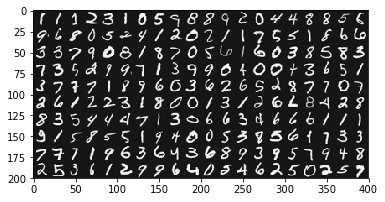

In [8]:
#Display 200 numbers randomly
shuffle(data)
showNumbers(data[:,:-1])
print('This are some 200 examples of the images that serve as the training set')

In [9]:
# Define functions
def sigmoid(z):
    return 1/(1+exp(-z))

def costFunction(theta,x,y, lamda=0):
    theta = reshape(theta,(theta.size,1))
    pred = sigmoid(dot(x,theta))
    J = mean(-y*log(pred)-(1-y)*log(1-pred))
    J = J + lamda*sum(square(theta[1:]))/(2*m)
    return J

def gradient(theta,x,y,lamda=0):
    theta = reshape(theta,(theta.size,1))
    pred = sigmoid(dot(x,theta))
    grad = dot(x.T,pred-y)/m
    grad[1:] = grad[1:] + lamda*theta[1:]/m
    return grad.flatten()

def prediction(theta,x,polDeg,mu=0,sigma=1):
    theta = reshape(theta,(theta.size,1))
    x.shape = (1,x.shape[0])
    x = (x-mu)/sigma
    X = createPolynomialFeatures(x, polDeg)
    pred = sigmoid(dot(X,theta))
    return pred

def accuracy(pred,y):
    pred.shape = (pred.size,1)
    return sum(pred == y%10)/float(y.shape[0])*100

In [10]:
#This function checks the probability of being number C and not C
def oneVsAll(theta,x,y,lamda,C,miter):
    Y = (y == C).astype(int)
    theta = fmin_cg(costFunction,inTheta,fprime = gradient,args=(X,Y,lamda), maxiter = miter,disp = 0)
    return theta  

X = append(ones((x.shape[0],1)),x,axis=1)
m = X.shape[0]
n = X.shape[1]
inTheta = zeros(n)
lamda = .1;
maxIterations = 20

# Run configuration for numbers C
Theta = empty((10,n))
for C in range(1,11):
    Theta[C % 10,:] = oneVsAll(inTheta,X,y,lamda, C, maxIterations)
    print('Finished oneVsAll checking number: %d' %C)
print('All the numbers have been checked')

Finished oneVsAll checking number: 1
Finished oneVsAll checking number: 2
Finished oneVsAll checking number: 3
Finished oneVsAll checking number: 4
Finished oneVsAll checking number: 5
Finished oneVsAll checking number: 6
Finished oneVsAll checking number: 7
Finished oneVsAll checking number: 8
Finished oneVsAll checking number: 9
Finished oneVsAll checking number: 10
All the numbers have been checked


In [11]:
# Store the prediction that gives the highest probability
allProb = sigmoid(dot(X,Theta.T))
prob = amax(sigmoid(dot(X,Theta.T)),axis=1)
pred = argmax(sigmoid(dot(X,Theta.T)),axis=1)

In [12]:
# Calculate the accuracy of the algorithm by cross-referencing with y
acc = accuracy(pred,y)
print('The algorithm correctly predicts %f %% of the sample' %acc)

The algorithm correctly predicts 86.000000 % of the sample


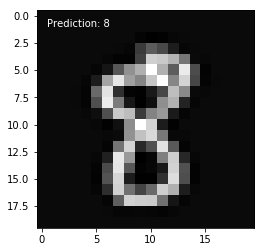

In [13]:
# Show an animation showing the drawing and the prediction of the algorithm
def arrayToImage(i):
    X = reshape(x[i],(20,20)).T
    return X

def animate(*args):
    i = randint(5000)
    im = ax.imshow(arrayToImage(i), cmap = 'gray')
    prediction.set_text('Prediction: %d'%pred[i])
    return im,prediction

fig = plt.figure()
ax = plt.axes()
im = ax.imshow(arrayToImage(0), cmap = 'gray')
prediction = ax.text(.5, 1, '', color= 'white')

anim = FuncAnimation(fig, animate,interval = 1500)